In [132]:
################################
# Solves du/dt = u''           #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np


# Problem Parameters
a = 0.
b = 1.
alpha = 1.


def f(*x):
    return np.prod(np.sin(np.pi * np.asarray(x)), axis=0)


def g(t, *x):
    return np.zeros_like(x[0])


def exact(t, *x):
    return np.exp(- np.pi ** 2 * alpha * t) * np.prod(np.sin(np.pi * np.asarray(x)), axis=0)

In [133]:
# Parameters
d = 1
k = 2
delta = 1.
N = 501
dt = 0.025
tn = 50

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)
idx_funcs = [
    lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0),
    lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0),
]
operators = [
    lambda func: lambda *x: alpha * func.laplacian(*x),
    lambda func: lambda *x: func(*x),
]

# Solve for approximate solution
solver = rad.solve.TemporalSolver(d, k, delta, xc, operators, idx_funcs, dt, tn)
result = solver.solve(f, g)

In [134]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display_html


fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(a, b, 100)
t = np.linspace(0, 1, len(result))
approx_line, = ax.plot(*xc, result[0], '.-')
exact_line, = ax.plot(x, exact(0, x))


def func(i):
    approx_line.set_ydata(result[i])
    exact_line.set_ydata(exact(t[i], x))
    return approx_line, exact_line,


anim = animation.FuncAnimation(
    fig,
    func,
    frames=tn,
    interval=1000,
    blit=True,
    repeat=True
)

display_html(HTML(anim.to_jshtml()))
plt.close()

Once 
 
 Loop 
 
 Reflect

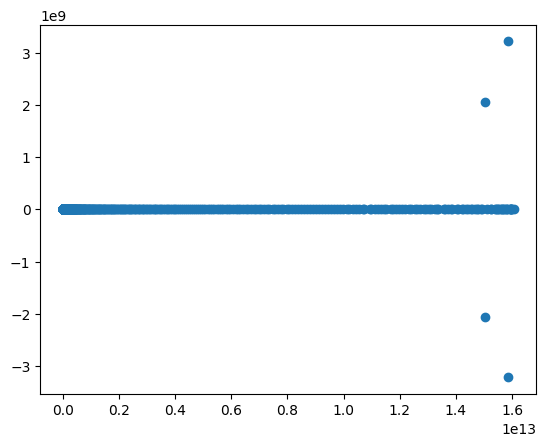

In [135]:
evals = np.linalg.eigvals(solver.mat)
plt.scatter(np.real(evals), np.imag(evals))
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)
plt.show()